# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:  Nabila Jauza Firjatullah
- Email: nabilazafirlla@gmail.com
- Id Dicoding: billa-firza

## Persiapan

### Menyiapkan library yang dibutuhkan

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score

### Menyiapkan data yang akan digunakan

In [38]:
# Membaca data dari file CSV
data_file_path = 'data/data.csv'
data = pd.read_csv(data_file_path, delimiter=';')

## Data Understanding

In [39]:
# Menampilkan informasi awal dari dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [40]:
print(data.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

In [41]:
# Menampilkan statistik deskriptif dasar dari dataset
print(data.describe(include='all'))

        Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  44

In [42]:
# Memeriksa missing values
missing_values = data.isnull().sum()
print(missing_values)

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [43]:
# Memeriksa data duplikat
duplicate_rows = data[data.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')


Number of duplicate rows: 0


In [44]:
# Menampilkan tipe data setiap kolom
print(data.dtypes)


Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

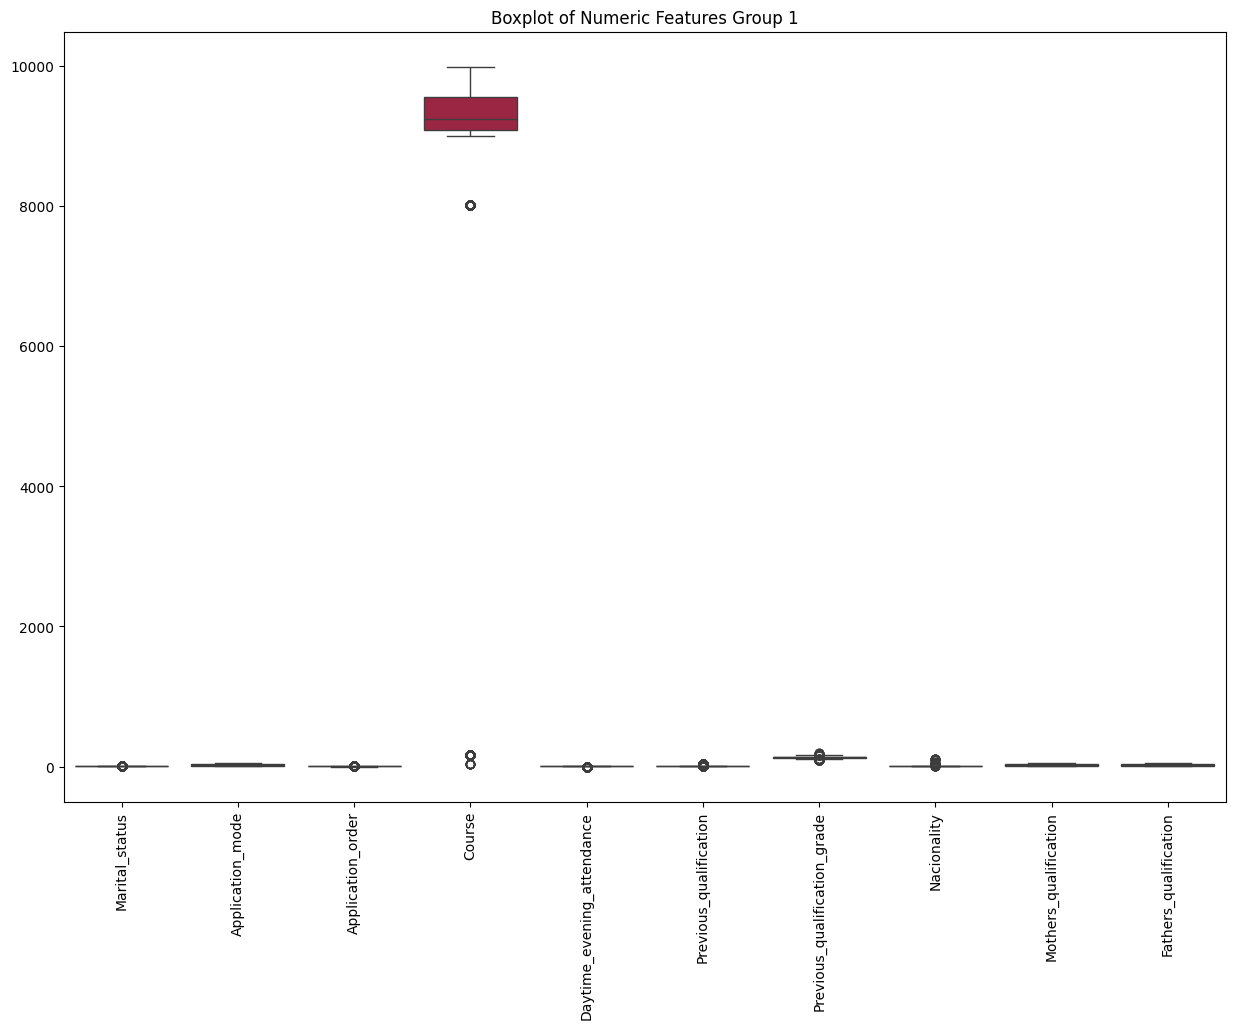

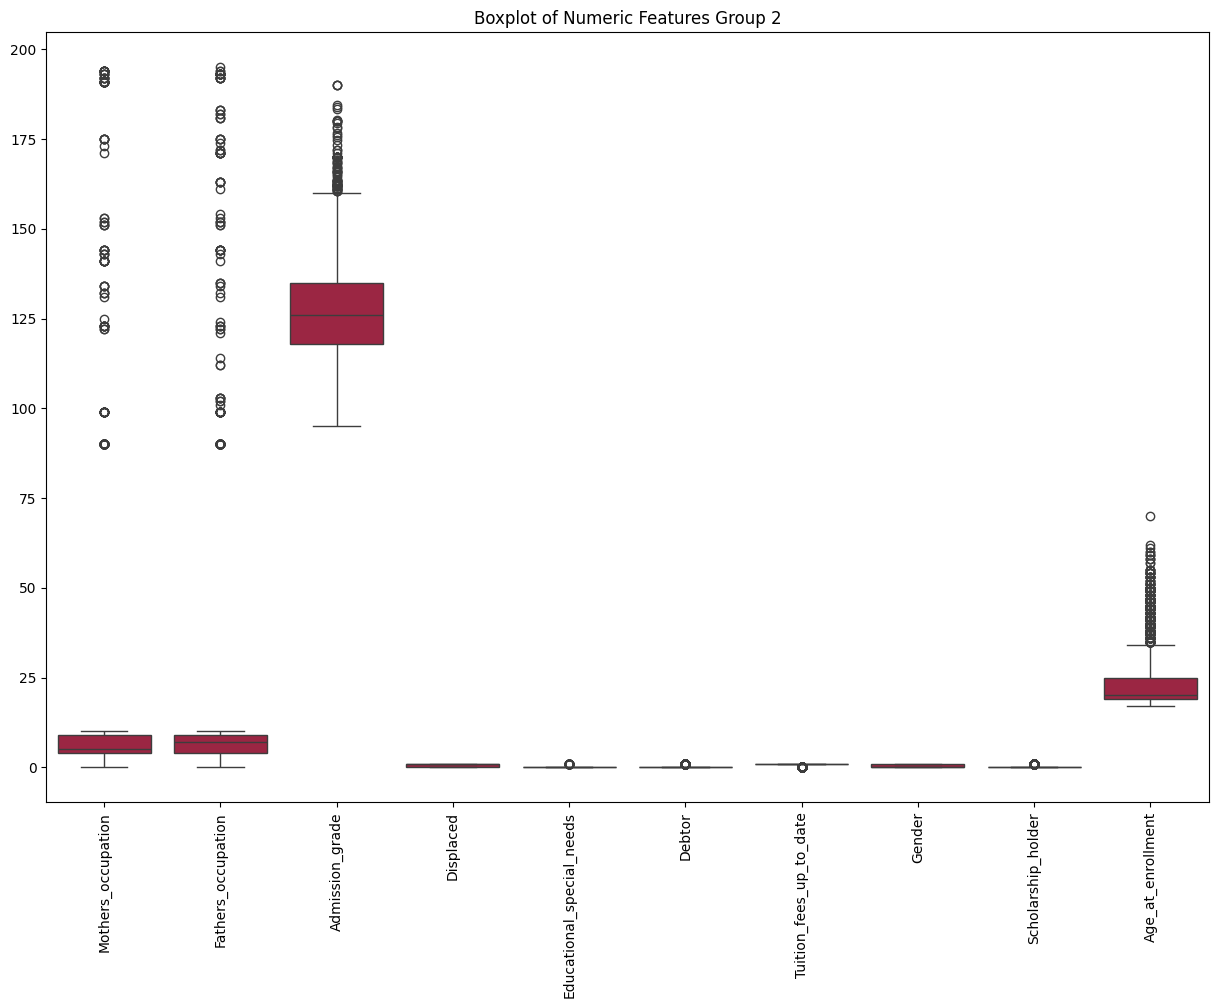

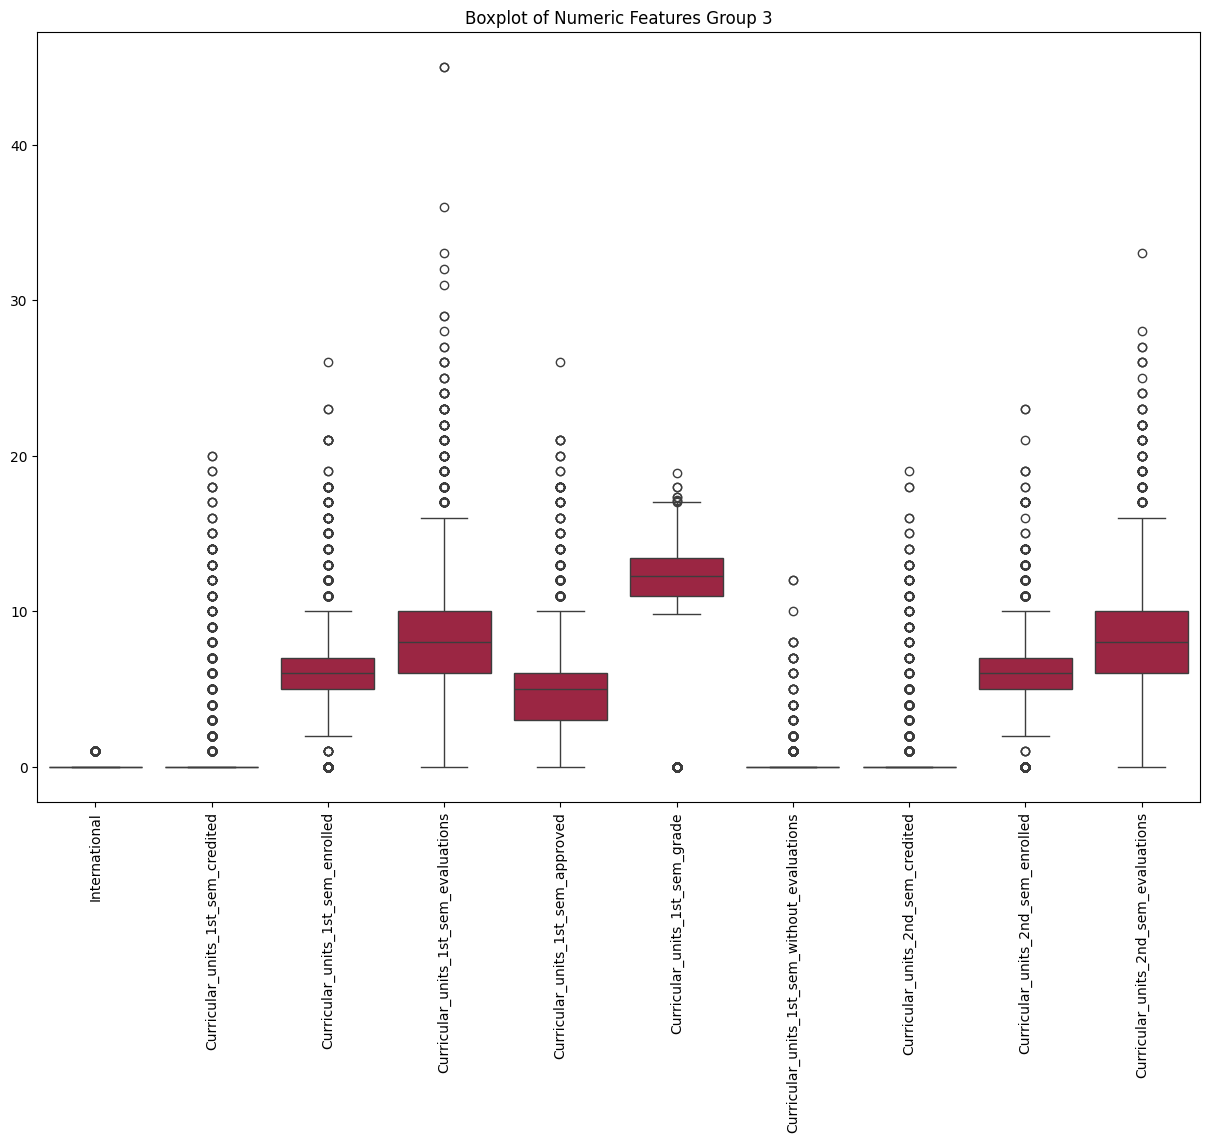

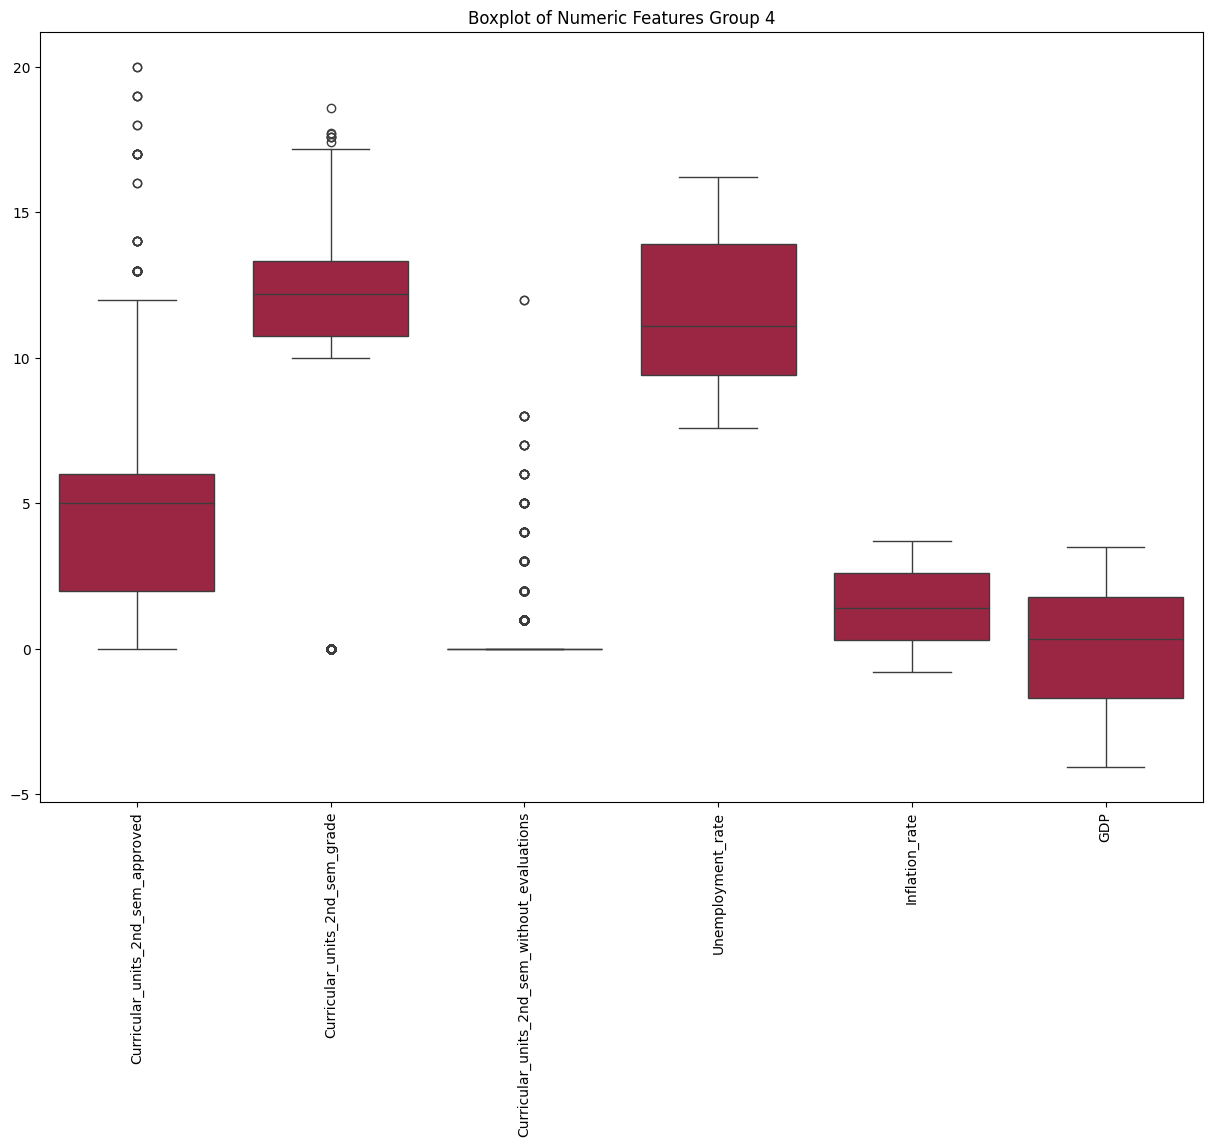

In [45]:
# Memilih semua kolom numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Membagi kolom numerik menjadi beberapa grup
group_size = 10  # Ukuran grup
num_groups = len(numerical_cols) // group_size + 1

for i in range(num_groups):
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data[numerical_cols[i*group_size:(i+1)*(group_size)]], color='#ae123a')
    plt.title(f'Boxplot of Numeric Features Group {i+1}')
    plt.xticks(rotation=90)
    plt.show()


In [46]:
# Memeriksa distribusi kelas target
class_distribution = data['Status'].value_counts()
print(class_distribution)


Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


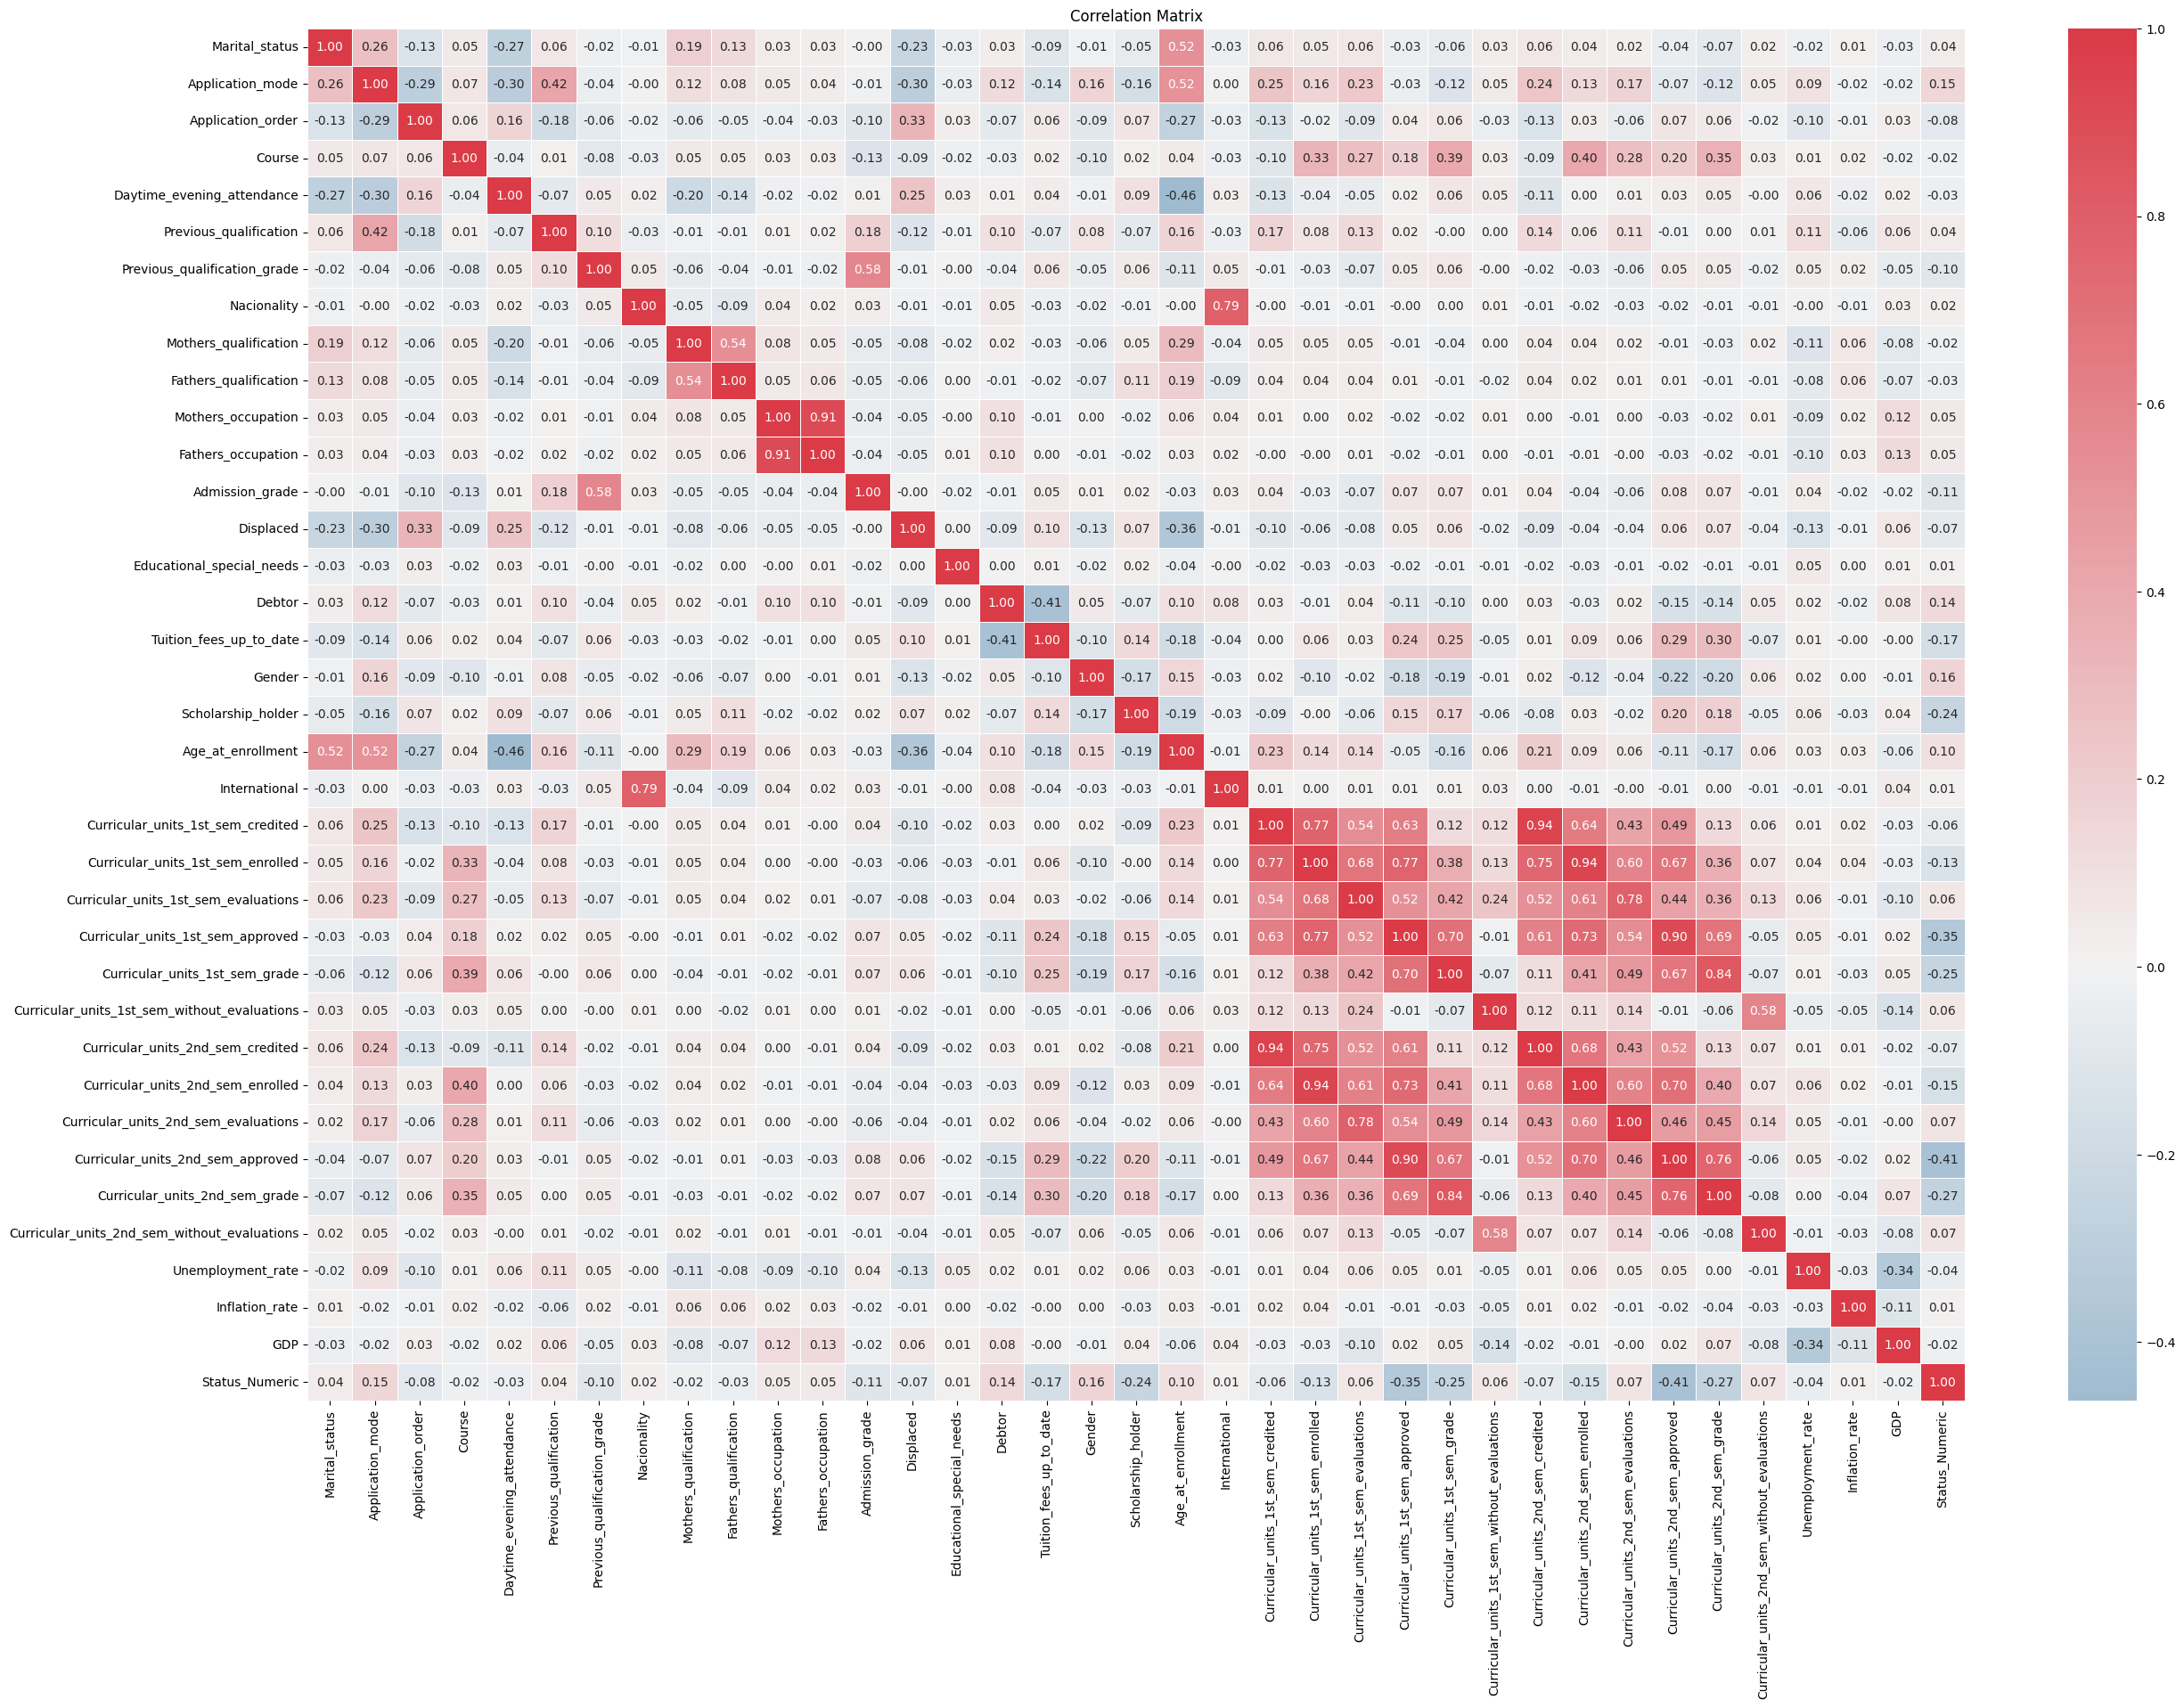

In [47]:
# Membuat salinan data
data_copy = data.copy()

# Mengubah 'Status' menjadi numerik di salinan data
data_copy['Status_Numeric'] = data_copy['Status'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})

# Menghapus kolom 'Status' asli dari salinan data
data_copy.drop(columns=['Status'], inplace=True)

# Menghitung matriks korelasi
correlation_matrix = data_copy.corr()

# Definisikan custom color palette
custom_palette = ["#E6A4B4", "#F3D7CA", "#FFF8E3", "#F5EEE6", "#FFFFFF", "#F5EEE6", "#FFF8E3", "#F3D7CA", "#E6A4B4"]

# Custom diverging palette
custom_cmap = sns.diverging_palette(240, 10, n=9, center="light", as_cmap=True)

# Visualisasi korelasi menggunakan heatmap dengan custom palette
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=0.5, center=0)
plt.title('Correlation Matrix')
plt.show()


## Data Preparation / Preprocessing

In [48]:
def preprocess_data(data):
    # Membuat salinan data
    data_preprocessed = data.copy()
    
    # Mengubah 'Status' menjadi numerik di salinan data
    data_preprocessed['Status_Numeric'] = data_preprocessed['Status'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
    
    # Memisahkan fitur dan label
    X = data_preprocessed.drop(columns=['Status_Numeric', 'Status'])
    y = data_preprocessed['Status_Numeric']
    
    # Encoding variabel kategorikal (jika ada)
    categorical_cols = X.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    
    # Normalisasi fitur numerik
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    
    return X, y, scaler

In [49]:
# Preprocessing data
X, y, scaler = preprocess_data(data)

# Menyimpan scaler untuk digunakan nanti
joblib.dump(scaler, 'model/scaler.joblib')


['model/scaler.joblib']

In [50]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dari set pelatihan dan set pengujian
print("Ukuran set pelatihan:", X_train.shape)
print("Ukuran set pengujian:", X_test.shape)


Ukuran set pelatihan: (3539, 36)
Ukuran set pengujian: (885, 36)


## Modeling

In [51]:
# Melatih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Memprediksi pada set pengujian
y_pred_rf = rf.predict(X_test)

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Akurasi Random Forest:", accuracy_rf)
print("Confusion Matrix Random Forest:\n", conf_matrix_rf)
print("Classification Report Random Forest:\n", class_report_rf)


Akurasi Random Forest: 0.7604519774011299
Confusion Matrix Random Forest:
 [[387   8  23]
 [ 52 243  21]
 [ 72  36  43]]
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       418
           1       0.85      0.77      0.81       316
           2       0.49      0.28      0.36       151

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



## Evaluation

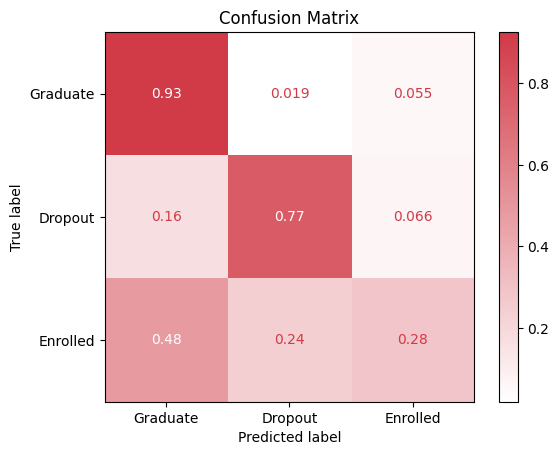

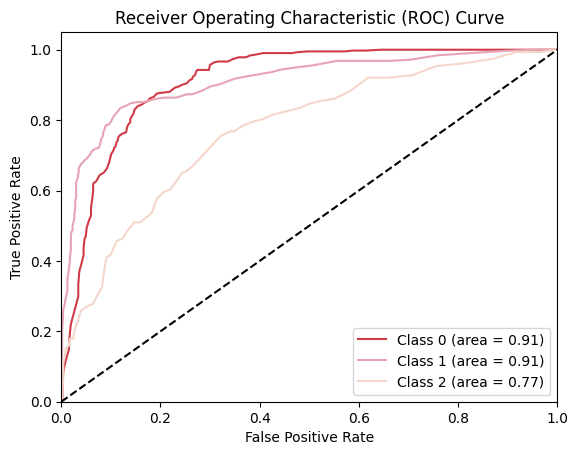

In [52]:
# Warna untuk plotting
colors = ['#D13A47', '#E6A4B4', '#F3D7CA', '#FFF8E3']


# Custom colormap untuk confusion matrix
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['white', '#D13A47'])

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=['Graduate', 'Dropout', 'Enrolled'], cmap=cmap, normalize='true')
plt.title('Confusion Matrix')
plt.show()

# Binarize the output for ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Predict probabilities
y_score = rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [53]:
# Menggunakan cross-validation untuk mengevaluasi model dengan metrik lain
cv_accuracy = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(rf, X, y, cv=5, scoring='precision_weighted')
cv_recall = cross_val_score(rf, X, y, cv=5, scoring='recall_weighted')
cv_f1 = cross_val_score(rf, X, y, cv=5, scoring='f1_weighted')

print("Cross-Validation Accuracy:", cv_accuracy.mean())
print("Cross-Validation Precision:", cv_precision.mean())
print("Cross-Validation Recall:", cv_recall.mean())
print("Cross-Validation F1 Score:", cv_f1.mean())


Cross-Validation Accuracy: 0.7744093360942813
Cross-Validation Precision: 0.760673290381559
Cross-Validation Recall: 0.7744093360942813
Cross-Validation F1 Score: 0.7586167787507898


In [54]:
# Menyimpan model Random Forest
joblib.dump(rf, 'model/random_forest_model.joblib')

['model/random_forest_model.joblib']